In [1]:
#hwllo


In [2]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Tarique\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import yfinance as yf

In [4]:
# 1 Data Retival

In [5]:
tickers = "AAPL"

In [6]:
data = yf.download(tickers,period='2y')

[*********************100%%**********************]  1 of 1 completed


In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-22,169.690002,169.860001,167.139999,167.570007,165.733704,69026800
2022-08-23,167.080002,168.710007,166.649994,167.229996,165.397430,54147100
2022-08-24,167.320007,168.110001,166.250000,167.529999,165.694138,53841500
2022-08-25,168.779999,170.139999,168.350006,170.029999,168.166733,51218200
2022-08-26,170.570007,171.050003,163.559998,163.619995,161.826996,78961000


In [8]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
data['Date'] =pd.to_datetime(data.index)

In [10]:
data.set_index('Date', inplace=True)

In [11]:
data.sample(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-08,154.639999,156.360001,152.679993,154.460007,152.767380,84923800
2024-06-24,207.720001,212.699997,206.589996,208.139999,207.899353,80727000
2023-06-06,179.970001,180.119995,177.429993,179.210007,178.057190,64848400
2022-12-08,142.360001,143.520004,141.100006,142.649994,141.320816,62128300
2023-05-01,169.279999,170.449997,168.639999,169.589996,168.266327,52472900


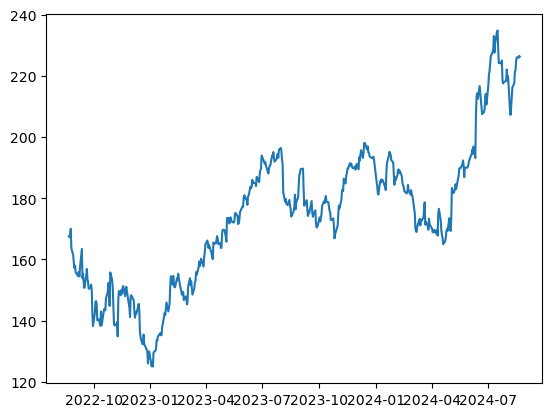

In [12]:
plt.plot(data['Close'])

In [14]:
data['7-days'] = data['Close'].rolling(window=7).mean()

In [15]:
data['21-days'] = data['Close'].rolling(window=21).mean()

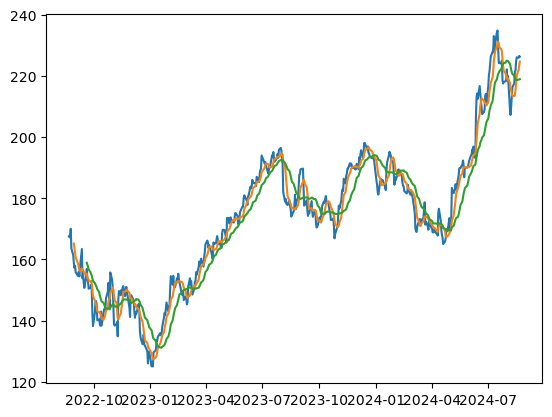

In [17]:
plt.plot(data['Close'])
plt.plot(data['7-days'])
plt.plot(data['21-days'])
plt.show()

In [18]:
data['Price Range'] = data['High'] - data['Low']

In [19]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,7-days,21-days,Price Range
Date,,,,,,,,,
2022-08-22,169.690002,169.860001,167.139999,167.570007,165.733704,69026800,NaN,NaN,2.720001
2022-08-23,167.080002,168.710007,166.649994,167.229996,165.397430,54147100,NaN,NaN,2.060013
2022-08-24,167.320007,168.110001,166.250000,167.529999,165.694138,53841500,NaN,NaN,1.860001
2022-08-25,168.779999,170.139999,168.350006,170.029999,168.166733,51218200,NaN,NaN,1.789993
2022-08-26,170.570007,171.050003,163.559998,163.619995,161.826996,78961000,NaN,NaN,7.490005


In [20]:
data['Daily Return'] = data['Close'].pct_change()

In [21]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,7-days,21-days,Price Range,Daily Return
Date,,,,,,,,,,
2022-08-22,169.690002,169.860001,167.139999,167.570007,165.733704,69026800,NaN,NaN,2.720001,NaN
2022-08-23,167.080002,168.710007,166.649994,167.229996,165.397430,54147100,NaN,NaN,2.060013,-0.002029
2022-08-24,167.320007,168.110001,166.250000,167.529999,165.694138,53841500,NaN,NaN,1.860001,0.001794
2022-08-25,168.779999,170.139999,168.350006,170.029999,168.166733,51218200,NaN,NaN,1.789993,0.014923
2022-08-26,170.570007,171.050003,163.559998,163.619995,161.826996,78961000,NaN,NaN,7.490005,-0.037699


In [43]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
7-days          0
21-days         0
Price Range     0
Daily Return    0
dtype: int64

In [44]:
features = ['Open','High', 'Low', 'Volume','Price Range','Daily Return']

In [45]:
features

['Open', 'High', 'Low', 'Volume', 'Price Range', 'Daily Return']

In [46]:
target = ['Close']

In [47]:
target

['Close']

In [48]:
train_data = data[-61:-1]

In [49]:
train_data.shape

(60, 10)

In [51]:
X_train = train_data[features]

In [56]:
y_train = train_data[target]


In [54]:
X_test = train_data[-1:][features]

In [55]:
y_test = train_data[-1:][target]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
from sklearn.metrics import mean_absolute_error

In [60]:
RFR = RandomForestRegressor(n_estimators=100, random_state=101)

In [61]:
RFR.fit(X_train,y_train)

C:\Users\Tarique\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=101)

In [63]:
pred = RFR.predict(X_test)

In [64]:
mae = mean_absolute_error(y_test,pred)

In [65]:
print("MEan Absolute Error",mae)

MEan Absolute Error 0.0741979980468841


In [67]:
next_pred = RFR.predict(X_test)

In [68]:
next_pred[0]

226.43579650878905

In [74]:
next_day = X.iloc[-1].values.reshape(1, -1)
predicted_close = RFR.predict(next_day)
print(f'Predicted Closing Price for the next day: {predicted_close[0]}')

Predicted Closing Price for the next day: 227.41229675292968


C:\Users\Tarique\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [72]:
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [77]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [78]:
rf_pg = RandomForestRegressor(random_state=42)

In [79]:
grid_search = GridSearchCV(estimator=rf_pg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')


In [80]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\Tarique\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=2)

In [81]:
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [82]:
best_model = grid_search.best_estimator_


In [83]:
y_pred = best_model.predict(X_test)


In [84]:
mae = mean_absolute_error(y_test, y_pred)


In [85]:
print(f'Optimized Mean Absolute Error: {mae}')


Optimized Mean Absolute Error: 1.0788203749912981


In [86]:
next_pred = best_model.predict(X_test)

In [89]:
next_pred[0]

173.61527508061067

In [90]:
next_day = X.iloc[-1].values.reshape(1, -1)
predicted_close = best_model.predict(next_day)
print(f'Predicted Closing Price for the next day: {predicted_close[0]}')

Predicted Closing Price for the next day: 226.18845687866212


C:\Users\Tarique\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [91]:
X_train

,Open,High,Low,Volume,Price Range,Daily Return
Date,,,,,,
2024-01-18,186.089996,189.139999,185.830002,78005800,3.309998,0.032571
2022-11-18,152.309998,152.699997,149.970001,74829600,2.729996,0.003782
2022-11-09,138.500000,138.550003,134.589996,74917800,3.960007,-0.033190
2023-07-31,196.059998,196.490005,195.259995,38824100,1.230011,0.003166
2023-01-31,142.699997,144.339996,142.279999,65874500,2.059998,0.009021
...,...,...,...,...,...,...
2022-12-19,135.110001,135.199997,131.320007,79592600,3.879990,-0.015910
2024-01-08,182.089996,185.600006,181.500000,59144500,4.100006,0.024175
2024-01-24,195.419998,196.380005,194.339996,53631300,2.040009,-0.003484


In [92]:
X_test

,Open,High,Low,Volume,Price Range,Daily Return
Date,,,,,,
2023-05-05,170.979996,174.300003,170.759995,113316400,3.540009,0.046927
2024-01-03,184.220001,185.880005,183.429993,58414500,2.450012,-0.007488
2024-07-08,227.089996,227.850006,223.250000,59085900,4.600006,0.006539
2022-11-02,148.949997,152.169998,145.000000,93604600,7.169998,-0.037305
2023-08-22,177.059998,177.679993,176.250000,42084200,1.429993,0.007905
...,...,...,...,...,...,...
2023-06-06,179.970001,180.119995,177.429993,64848400,2.690002,-0.002060
2024-04-30,173.330002,174.990005,170.000000,65934800,4.990005,-0.018271
2023-07-26,193.669998,195.639999,193.320007,47471900,2.319992,0.004545


In [93]:
y_train

,Close
Date,
2024-01-18,188.630005
2022-11-18,151.289993
2022-11-09,134.869995
2023-07-31,196.449997
2023-01-31,144.289993
...,...
2022-12-19,132.369995
2024-01-08,185.559998
2024-01-24,194.500000


In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [96]:
X_train_scaled = scaler.fit_transform(X_train)

In [97]:
X_test_scaled = scaler.transform(X_test)

In [98]:
import tensorflow
from tensorflow import keras


In [99]:
from keras import Sequential
from keras.layers import Dense

In [100]:
model = Sequential()


In [120]:
model.add(Dense(6,activation='relu',input_dim=6))
model.add(Dense(10,activation='relu',input_dim=6))

model.add(Dense(1,activation='linear'))

C:\Users\Tarique\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [121]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 521 (2.04 KB)

 Trainable params: 235 (940.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 286 (1.12 KB)

In [122]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [123]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 29974.3359 - val_loss: 27180.5391
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26233.5410 - val_loss: 22798.9941
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21849.3535 - val_loss: 18394.1113
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17612.2930 - val_loss: 14185.2422
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13476.8975 - val_loss: 10388.3154
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9577.6582 - val_loss: 6931.0054
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6122.2837 - val_loss: 4056.5657
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3415.2656 - val_loss: 1953.6206
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1593.7250 - val_loss: 696.3450
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 526.0599 - val_loss: 157.7698
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 113.9341 - val_loss: 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 25.7343 - val_loss: 14.3757
Epoch 68/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.1231 - val_loss: 14.2863
Epoch 69/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.8988 - val_loss: 14.2968
Epoch 70/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.4631 - val_loss: 14.2178
Epoch 71/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.3325 - val_loss: 14.1928
Epoch 72/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.3789 - val_loss: 14.0782
Epoch 73/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.8745 - val_loss: 13.9741
Epoch 74/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.2988 - val_loss: 13.9010
Epoch 75/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.8921 - val_loss: 13.9201
Epoch 76/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.6952 - val_loss: 13.7433
Epoch 77/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.5004 - val_loss: 13.7637
Epoch 78/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8

In [124]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


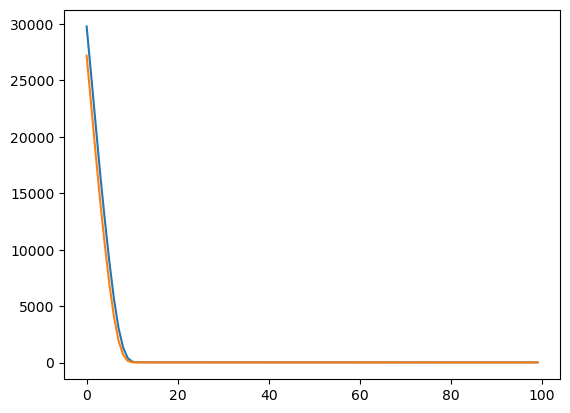

In [125]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

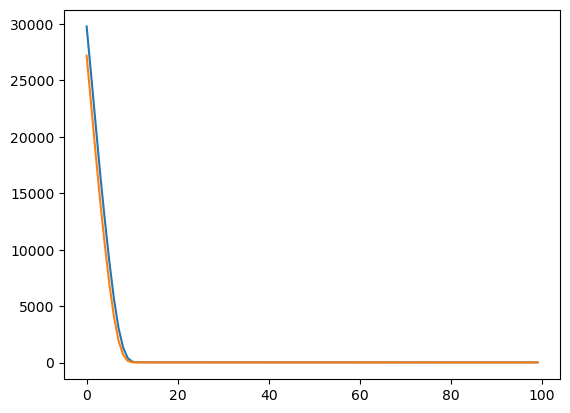

In [127]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [126]:
y_pred[0]

array([185.26411], dtype=float32)